In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("./TShirt_size.csv")

In [3]:
# df.head()

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(df.drop('T Shirt Size',axis=1))
scaled_features = scaler.transform(df.drop('T Shirt Size',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Height (in cms),Weight (in kgs)
0,-1.427493,-1.692456
1,-1.427493,-1.301889
2,-1.427493,0.260378
3,-0.951662,-1.301889
4,-0.951662,-0.911322


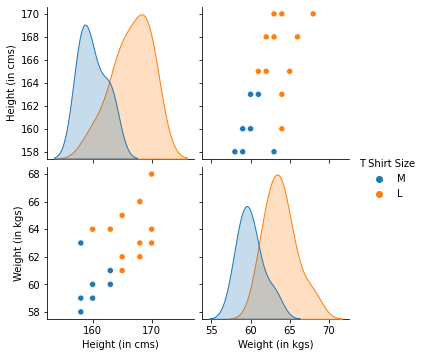

In [6]:
sns.pairplot(df,hue='T Shirt Size')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features,
        df['T Shirt Size'],
        test_size=0.25
)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Using KNN

We'll start with k=1.


In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [10]:
pred = knn.predict(X_test)


# Predictions and Evaluations


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [12]:
print(confusion_matrix(y_test,pred))


[[3 1]
 [0 1]]


In [13]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           L       1.00      0.75      0.86         4
           M       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [14]:
accuracy_rate = []

# Will take some time
for i in range(1,5):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['T Shirt Size'],cv=5)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

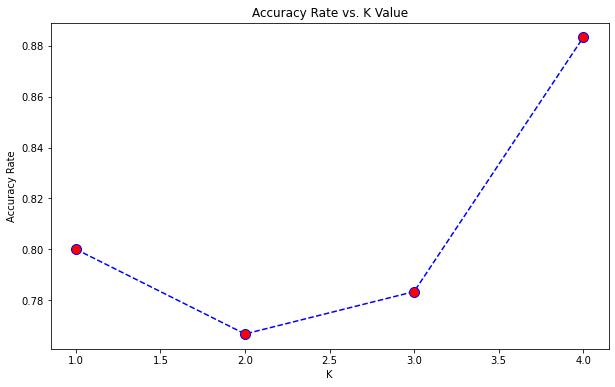

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [19]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[3 1]
 [0 1]]


              precision    recall  f1-score   support

           L       1.00      0.75      0.86         4
           M       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



In [18]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8
